In [12]:
import os, math
import numpy as np
from statistics import median
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline # you will want this if plotting with pyplot

UsageError: unrecognized arguments: # you will want this if plotting with pyplot


In [3]:
path = os.getcwd()+"/results/autonomous/time_series_500_0.99.txt"
autonomous = np.loadtxt(path)

path = os.getcwd()+"/results/enron_by_day/time_series_12_0.67.txt"
enron = np.loadtxt(path)        

In [4]:
def Moving_Range_Mean(lis):
    l = lis.shape[0]
    arr = lis - np.roll(lis, -1)
    return np.nansum(np.absolute(arr[1:-1]))/(l-1)

def give_stats(lis):
    mean_ = Moving_Range_Mean(lis)
    median_ = np.nanmedian(lis)
    upper_t = median_ + 3*mean_
    lower_t = median_ - 3*mean_
    return mean_, median_, lower_t, upper_t

def plot(lis, title):
    mean_, median_, lower_t, upper_t = give_stats(lis)
    plt.axhline(y=upper_t,linestyle='--',linewidth=4,color='red')
    plt.axhline(y=lower_t,linestyle='--',linewidth=4,color='red')
    plt.scatter(np.array([i for i in range(0,lis.shape[0])]), lis)
    plt.title(title)
    plt.xlabel("Time -------------------> ")
    plt.ylabel("Similarity Score --------->")
    plt.show()
    return None

def find_anomalies(list_files, dataset, root):
	#path = results_dir+dataset+"/"+"time_series"+"_"+str(g)+"_"+str(round(epsilon,2))+".txt"
	for file in list_files:
        
        mean_, median_, lower_t, upper_t = give_stats(time_series)
        anomalous_similarities = []
        
        with open(os.getcwd()+"/results/"+dataset+"/"+"anomalous_similarities"+"_"+str(g)+"_"+str(round(epsilon,2))+".txt", "w+") as f:
            for i in range(0, time_series.shape[0]):
                if time_series[i] < lower_t:
                    anomalous_similarities.append(i)
                    f.write(str(anomalous_similarities))
                    f.write("\n")
        with open(results_dir+dataset+"/"+"anomalous_time_stamp"+"_"+str(g)+"_"+str(round(epsilon,2))+".txt", "w+") as f:
            for i in range(1, len(anomalous_similarities)):
                if anomalous_similarities[i]-anomalous_similarities[i-1] == 1:
                    f.write(str(anomalous_similarities[i]))
                    f.write("\n")
        print("Anomalies written to the results folder ")
	return None    

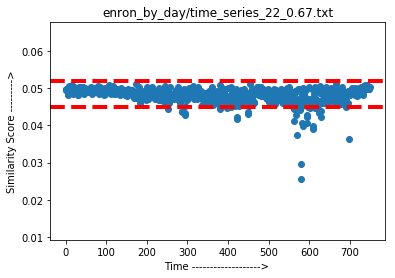

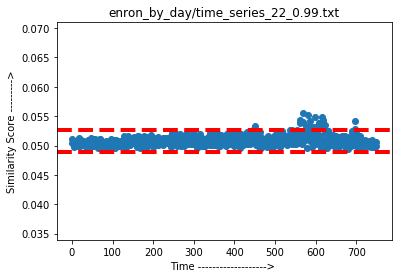

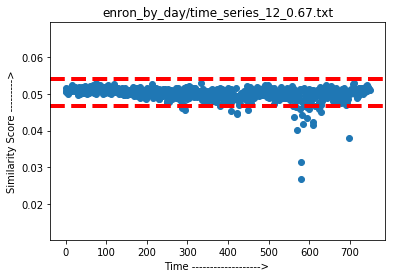

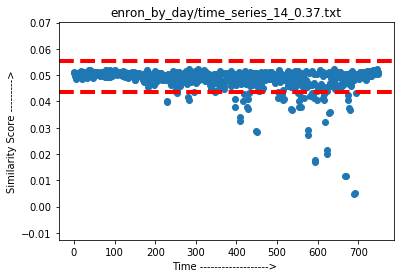

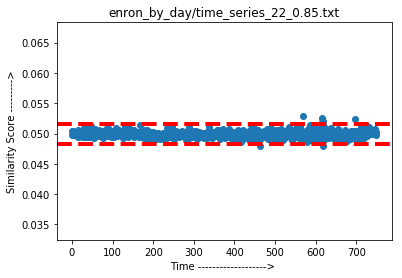

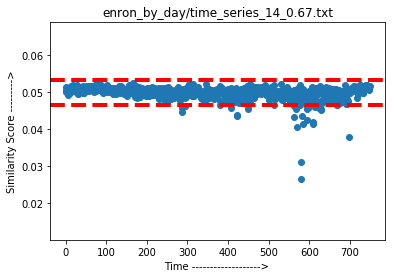

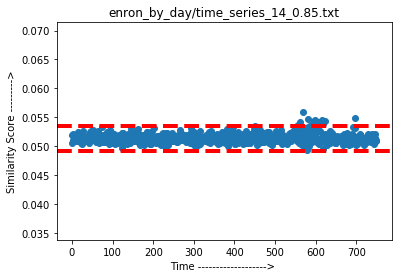

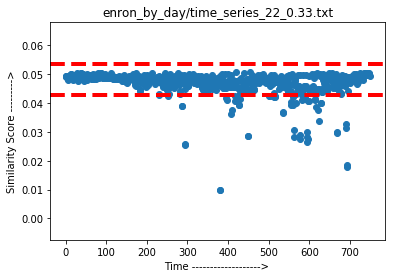

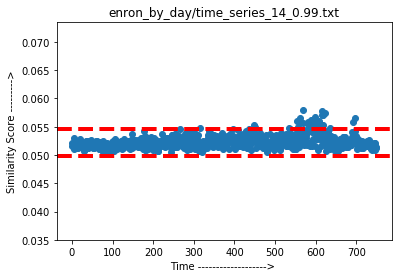

In [42]:
dataset = "enron_by_day"
list_files = os.listdir(os.getcwd()+"/results/"+dataset+"/")
root = "results/"
for file in list_files:
    arr = np.loadtxt(root+dataset+'/'+file)
    plot(arr, dataset+"/"+file)

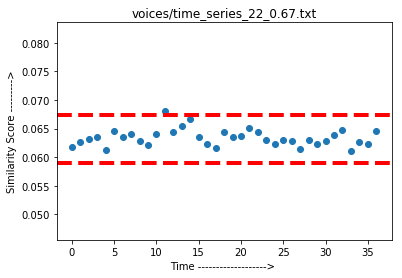

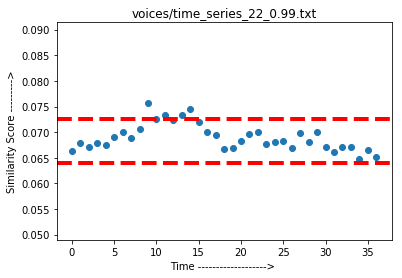

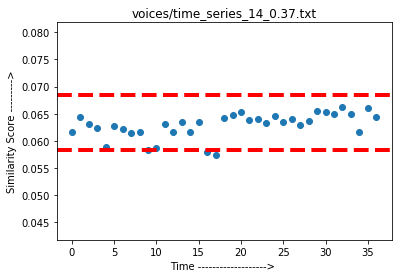

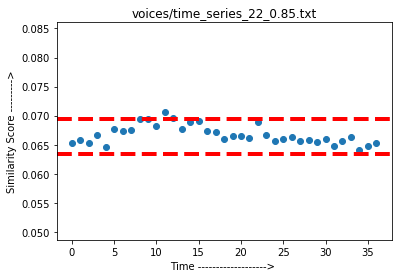

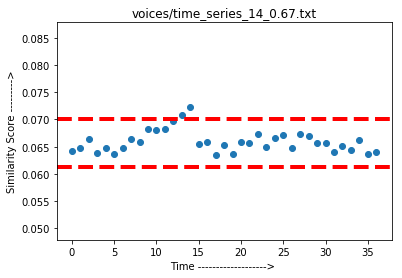

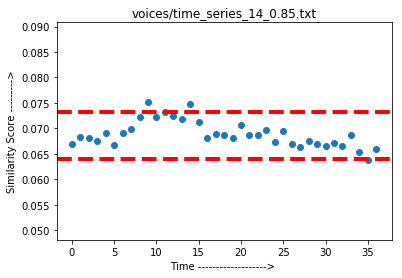

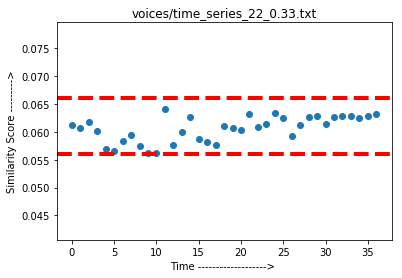

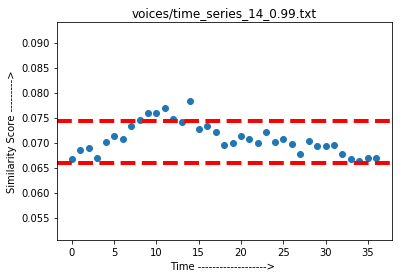

In [5]:
dataset = "voices"
list_files = os.listdir(os.getcwd()+"/results/"+dataset+"/")
root = "results/"
for file in list_files:
    arr = np.loadtxt(root+dataset+'/'+file)
    plot(arr, dataset+"/"+file)

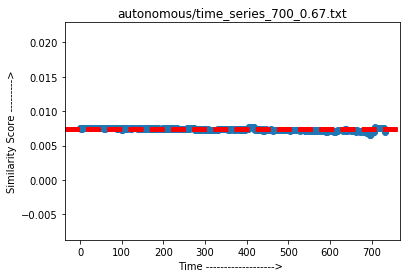

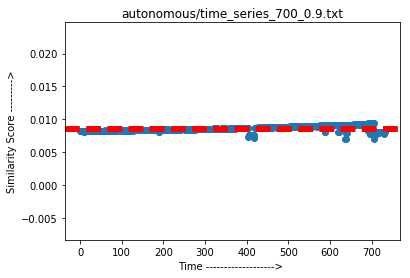

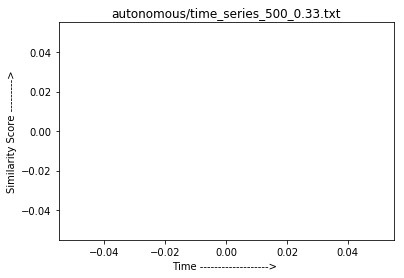

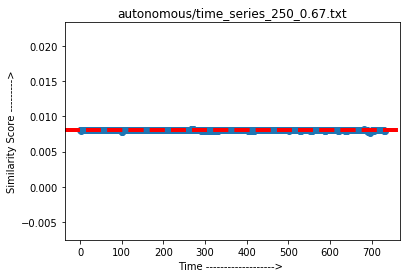

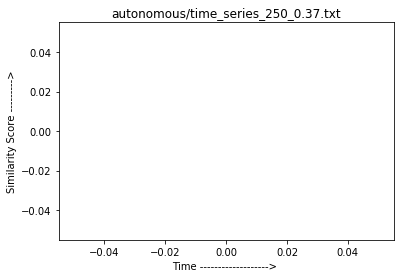

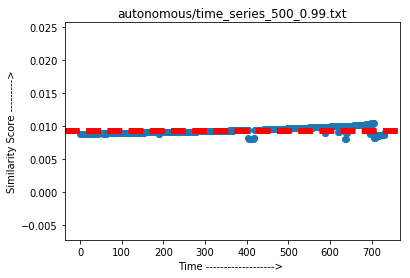

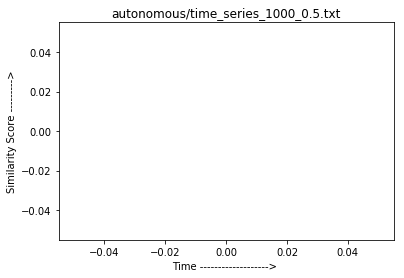

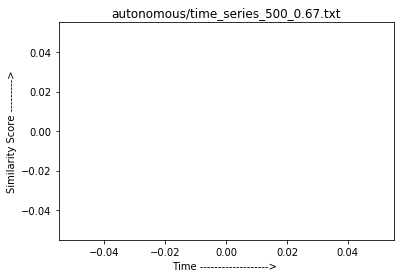

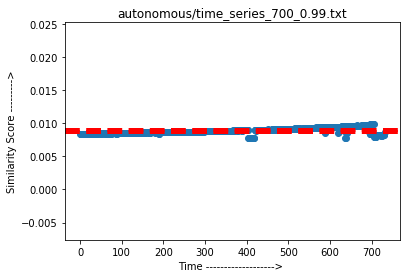

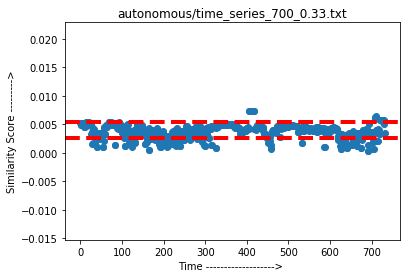

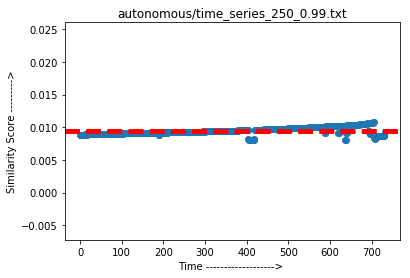

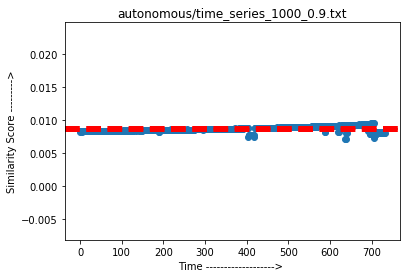

In [11]:
dataset = "autonomous"
list_files = os.listdir(os.getcwd()+"/results/"+dataset+"/")
root = "results/"
for file in list_files:
    arr = np.loadtxt(root+dataset+'/'+file)
    plot(arr, dataset+"/"+file)

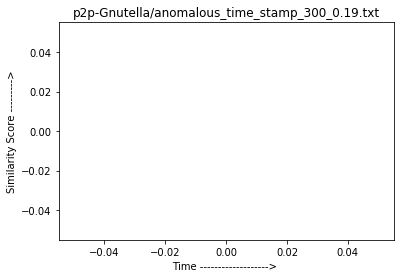

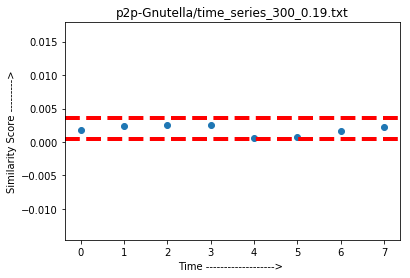

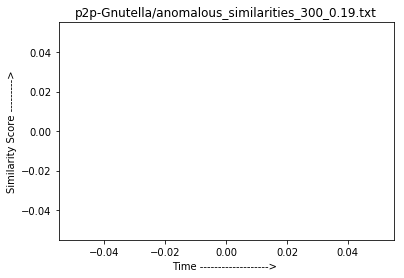

In [16]:
dataset = "p2p-Gnutella"
list_files = os.listdir(os.getcwd()+"/results/"+dataset+"/")
root = "results/"
for file in list_files:
    arr = np.loadtxt(root+dataset+'/'+file)
    plot(arr, dataset+"/"+file)